In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from tqdm import tqdm

#Defining symbols
s_12=Symbol("s_12",real=True)
s_23=Symbol("s_23",real=True)
s_13=Symbol("s_13",real=True)

c_12=Symbol("c_12",real=True)
c_23=Symbol("c_23",real=True)
c_13=Symbol("c_13",real=True)

d_cp=Symbol("d_cp",real=True)

D_m_12=Symbol("D_m_12",real=True)
D_m_13=Symbol("D_m_13",real=True)
D_m_23=Symbol("D_m_23",real=True)

L=Symbol("L",real=True,positive=True)
E_nu=Symbol("E_nu",real=True)


def PMNS_param_matrix():
    m=Matrix([
        [c_12*c_13,s_12*c_13,s_13*exp(-d_cp*1j)],
        [-s_12*c_23-c_12*s_23*s_13*exp(d_cp*1j),c_12*c_23-s_12*s_23*s_13*exp(d_cp*1j),s_23*c_13],
        [s_12*s_23-c_12*c_23*s_13*exp(d_cp*1j),-c_12*s_23-s_12*c_23*s_13*exp(d_cp*1j),c_23*c_13]])

    return m

PMNS=PMNS_param_matrix()

def Prob_a_to_b(a,b):
    """ 
    Parameters:
    a: flavor of the neutrino in the initial state
    b: flavor of the neutrino in the final state

    Function:
    Calculates the probability of a neutrino of flavor a to transform into flavor b, as
    a function of the mixing angles ,the mass differences, the distance traveled and the 
    energy of the neutrino.
    """
    if a == "e":
        index_a=0
    elif a == "mu":
        index_a=1
    elif a == "tau":
        index_a=2
    else:
        raise ValueError("Non existing neutrino flavor for initial state.")
    
    if b == "e":
        index_b=0
    elif b == "mu":
        index_b=1
    elif b == "tau":
        index_b=2
    else:
        raise ValueError("Non existing neutrino flavor for final state.")

    f=PMNS[index_b,0]*conjugate(PMNS[index_a,0])*PMNS[index_a,1]*conjugate(PMNS[index_b,1])
    s=PMNS[index_b,0]*conjugate(PMNS[index_a,0])*PMNS[index_a,2]*conjugate(PMNS[index_b,2])
    t=PMNS[index_b,1]*conjugate(PMNS[index_a,1])*PMNS[index_a,2]*conjugate(PMNS[index_b,2])

    first=re(f)*sin((D_m_12*L)/(4*E_nu))**2
    second=re(s)*sin((D_m_13*L)/(4*E_nu))**2
    third=re(t)*sin((D_m_23*L)/(4*E_nu))**2

    return -4*(first+second+third)


""" 
These functions are returning the sin and the cos respectively of the mixing angles.
"""
#The values where taken from the JUNO physics book
def s_ij(i,j):
    if (i==1 and j==2) or (i==2 and j==1):
        return 0.302**(1/2)
    elif (i==1 and j==3) or (i==3 and j==1):
        return 0.0227**(1/2)
    elif (i==2 and j==3) or (i==3 and j==2):
        return 0.413**(1/2)
    elif (i==j):
        raise ValueError("Not mixing! i=j")
    else:
        raise ValueError("Not excisting eigenstates! Must be 1,2 or 3.")

def c_ij(i,j):
    return (1-(s_ij(i,j)**2))**(1/2)

delta_cp=300

#Defining the possible flavors as strings
e="e"
mu="mu"
tau="tau"

#flavors=[e,mu,tau]
flavors=[e,mu]

#These variables are used fot the plots
dist=np.arange(0,13000,1)

eneg_range_1=np.arange(0.001,0.1,0.00001)
eneg_range_2=np.arange(0.1,10,0.001)    

list_of_all=[]

#Calculating the probabilities for all flavors
for a in tqdm(flavors):
    for b in tqdm(flavors):
        #Replacing sin and cos by their values known from experiments
        Equation=Prob_a_to_b(a,b).subs([(s_12,s_ij(1,2)),(c_12,c_ij(1,2)),(c_13,c_ij(1,3)),(c_23,c_ij(2,3)),(s_13,s_ij(1,3)),(s_23,s_ij(2,3)),(d_cp,delta_cp)])

        #Creating different equation for different values of energy
        eq_1_E=Equation.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(E_nu,10)])
        eq_2_E=Equation.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(E_nu,1)])
        eq_3_E=Equation.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(E_nu,0.1)]) 

        #Creating different equation for different distances
        eq_1_d=Equation.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(L,15)])
        eq_2_d=Equation.subs([(D_m_12,7.5*10**(-5)),(D_m_23,2.427*10**(-3)),(D_m_13,2.427*10**(-3)+7.5*10**(-5)),(L,13000)]) 

        to_plot_1_E=[]
        to_plot_2_E=[]
        to_plot_3_E=[]

        to_plot_1_d=[]
        to_plot_2_d=[]

        print("Calculation for "+a+" to "+b+" started!")
        #print("Calculation for the function of distance for "+a+" to "+b+" started!")
        for i in dist:
            to_plot_1_E.append(eq_1_E.subs([(L,i)]))
            to_plot_2_E.append(eq_2_E.subs([(L,i)]))
            to_plot_3_E.append(eq_3_E.subs([(L,i)]))
        #print("Distance Done!")


        #print("Calculation for the function of energy for "+a+" to "+b+" started!")
        for j in eneg_range_1:
            to_plot_1_d.append(eq_1_d.subs([(E_nu,j)]))
            to_plot_2_d.append(eq_2_d.subs([(E_nu,j)]))
        #print("First Done!")
        for j in eneg_range_2:
            to_plot_1_d.append(eq_1_d.subs([(E_nu,j)]))
            to_plot_2_d.append(eq_2_d.subs([(E_nu,j)]))
        #print("Second Done!")
        #print("Done!")
        
        title="P(nu_"+a+"->nu_"+b+")" 

        to_append=[title,to_plot_1_E,to_plot_2_E,to_plot_3_E,to_plot_1_d,to_plot_2_d]
        list_of_all.append(to_append)


  0%|          | 0/2 [00:00<?, ?it/s]

Calculation for e to e started!


Calculation for e to mu started!


 50%|█████     | 1/2 [10:12<10:12, 612.47s/it]

Calculation for mu to e started!


Calculation for mu to mu started!


100%|██████████| 2/2 [20:26<00:00, 613.07s/it]


In [28]:
list_of_all[3][0]

'P(nu_mu->nu_mu)'

### 1,2 AND 4 are for energy and 5 and 6 are for distance

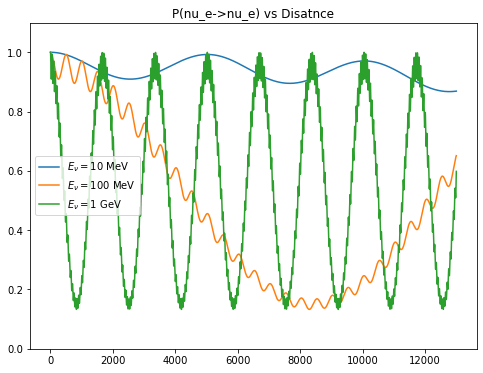

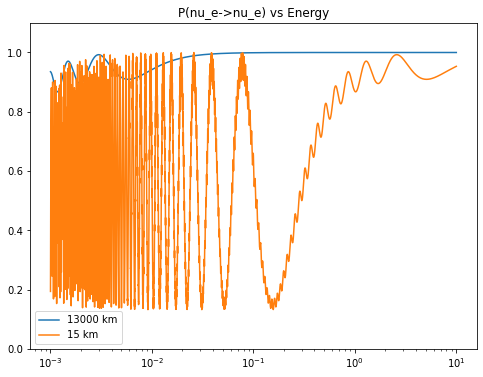

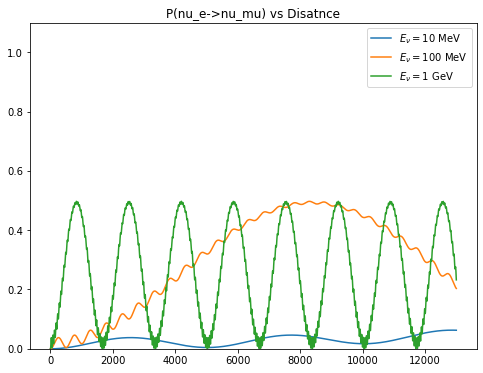

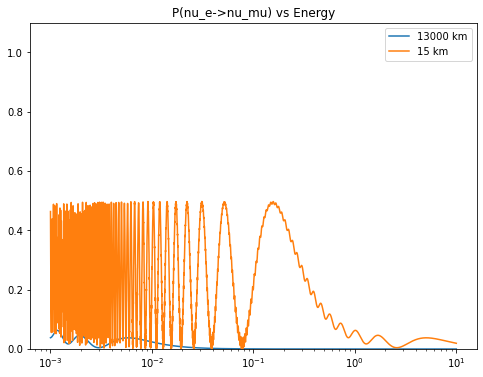

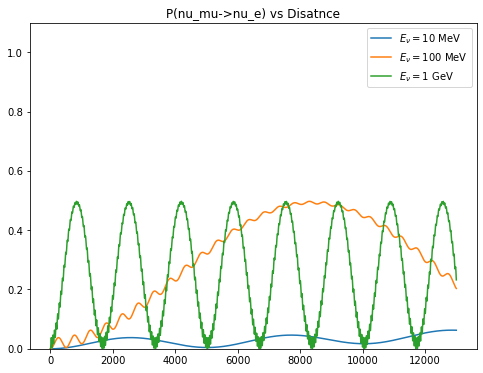

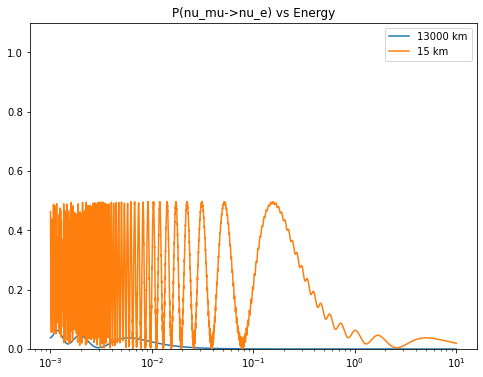

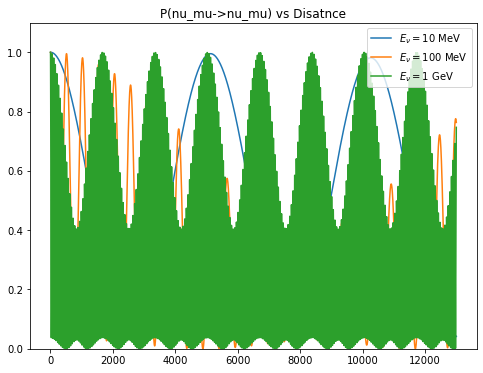

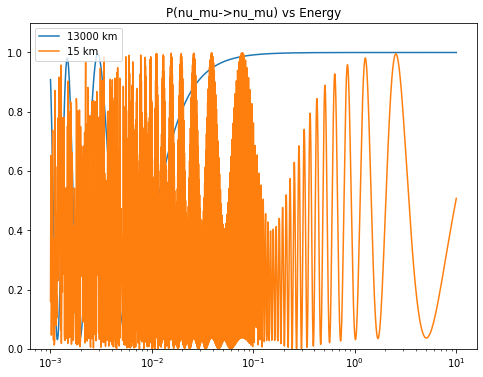

In [32]:
for type in list_of_all:
    if type[0]=="P(nu_e->nu_e)" or type[0]=="P(nu_mu->nu_mu)":
        plt.figure(figsize=(8,6))
        plt.title(type[0]+" vs Disatnce")
        plt.plot(dist,[1+i for i in type[1]],label=r"$E_{\nu}=10$ MeV")
        plt.plot(dist,[1+i for i in type[2]],label=r"$E_{\nu}=100$ MeV")
        plt.plot(dist,[1+i for i in type[4]],label=r"$E_{\nu}=1$ GeV")
        plt.legend()
        plt.ylim(0,1.1)

        plt.figure(figsize=(8,6))
        plt.title(type[0]+" vs Energy")
        plt.xscale("log")
        plt.plot(np.concatenate([eneg_range_1,eneg_range_2]),[1+i for i in type[5]],label="13000 km")
        plt.plot(np.concatenate([eneg_range_1,eneg_range_2]),[1+i for i in type[6]],label="15 km")
        plt.legend()
        plt.ylim(0,1.1)
    else:

        plt.figure(figsize=(8,6))
        plt.title(type[0]+" vs Disatnce")
        plt.plot(dist,type[1],label=r"$E_{\nu}=10$ MeV")
        plt.plot(dist,type[2],label=r"$E_{\nu}=100$ MeV")
        plt.plot(dist,type[4],label=r"$E_{\nu}=1$ GeV")
        plt.legend()
        plt.ylim(0,1.1)

        plt.figure(figsize=(8,6))
        plt.title(type[0]+" vs Energy")
        plt.xscale("log")
        plt.plot(np.concatenate([eneg_range_1,eneg_range_2]),type[5],label="13000 km")
        plt.plot(np.concatenate([eneg_range_1,eneg_range_2]),type[6],label="15 km")
        plt.legend()
        plt.ylim(0,1.1)